              precision    recall  f1-score   support

           0       0.99      0.76      0.86       930
           1       0.23      0.94      0.37        70

    accuracy                           0.78      1000
   macro avg       0.61      0.85      0.62      1000
weighted avg       0.94      0.78      0.83      1000



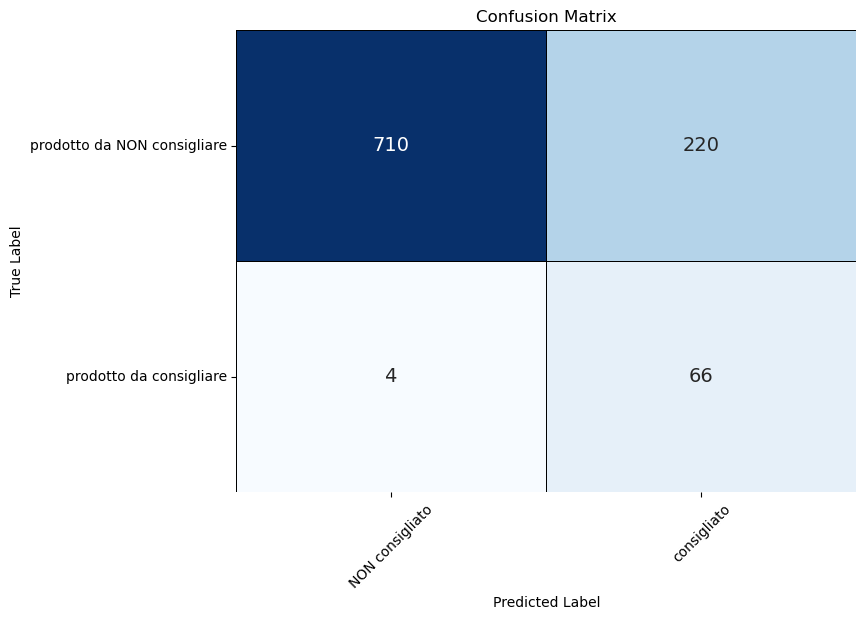

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       756
           1       0.64      1.00      0.78       244

    accuracy                           0.86      1000
   macro avg       0.82      0.91      0.84      1000
weighted avg       0.91      0.86      0.87      1000



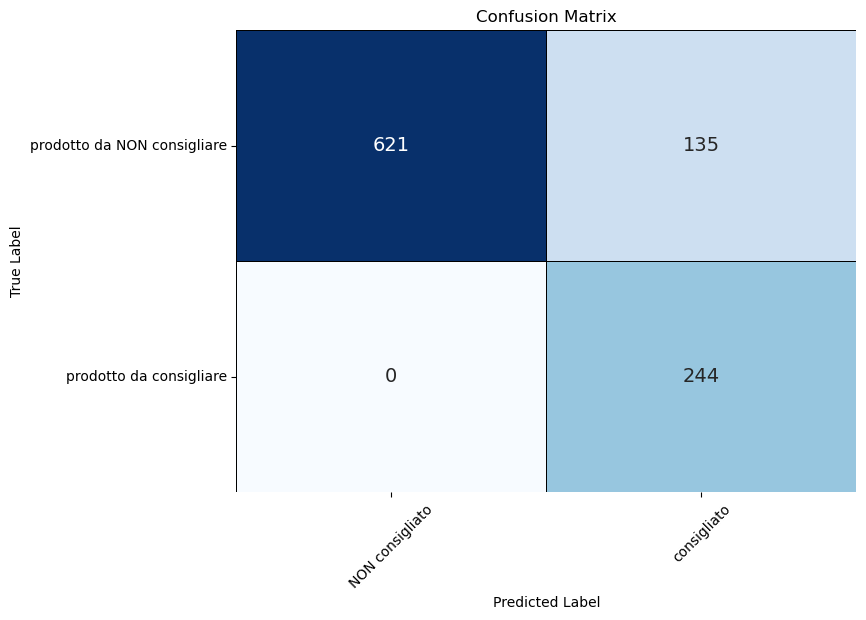

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       634
           1       0.96      1.00      0.98       366

    accuracy                           0.98      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.98      0.98      0.98      1000



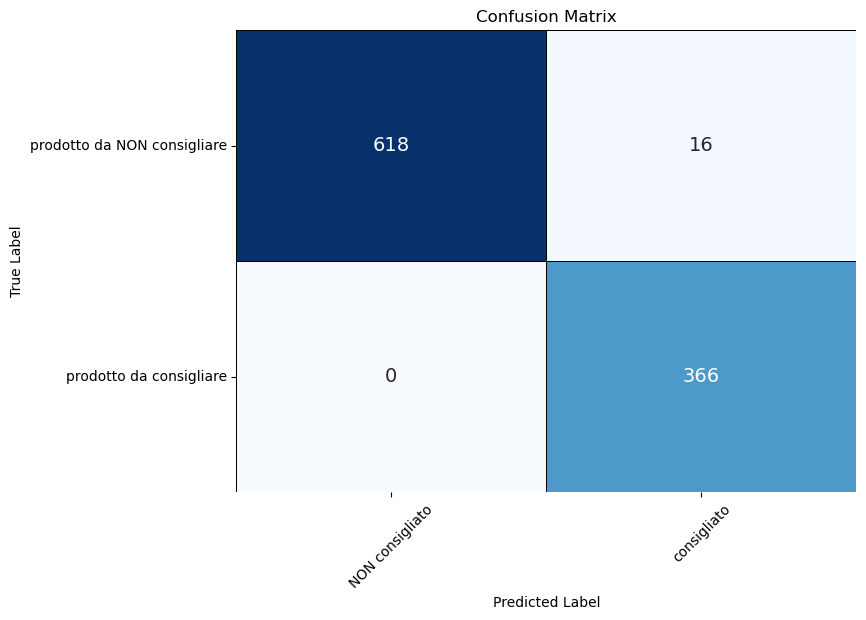

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       883
           1       0.34      1.00      0.50       117

    accuracy                           0.77      1000
   macro avg       0.67      0.87      0.68      1000
weighted avg       0.92      0.77      0.81      1000



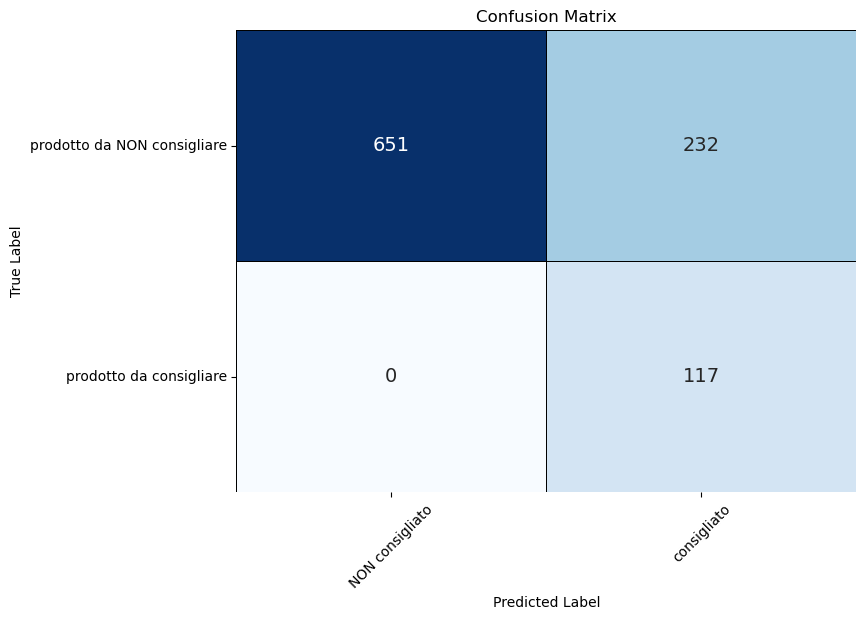

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       815
           1       0.43      1.00      0.60       185

    accuracy                           0.76      1000
   macro avg       0.72      0.85      0.71      1000
weighted avg       0.89      0.76      0.78      1000



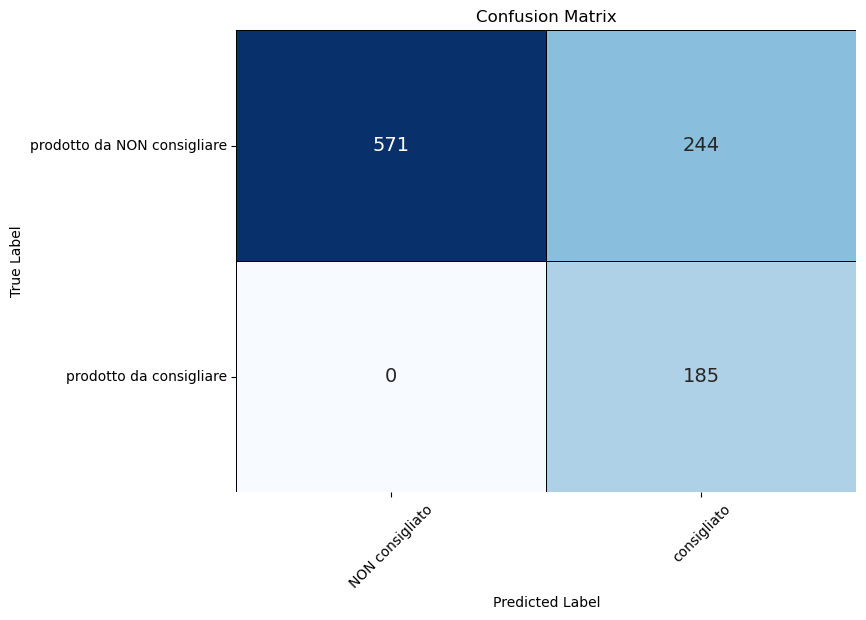

              precision    recall  f1-score   support

           0       1.00      0.70      0.83       749
           1       0.53      0.99      0.69       251

    accuracy                           0.78      1000
   macro avg       0.76      0.85      0.76      1000
weighted avg       0.88      0.78      0.79      1000



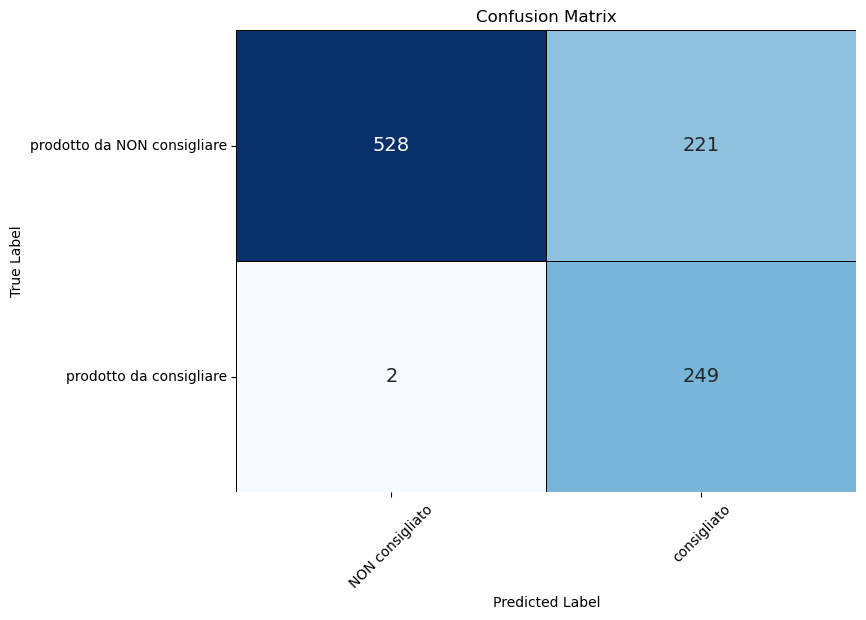

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       992
           1       0.05      0.62      0.09         8

    accuracy                           0.90      1000
   macro avg       0.52      0.76      0.52      1000
weighted avg       0.99      0.90      0.94      1000



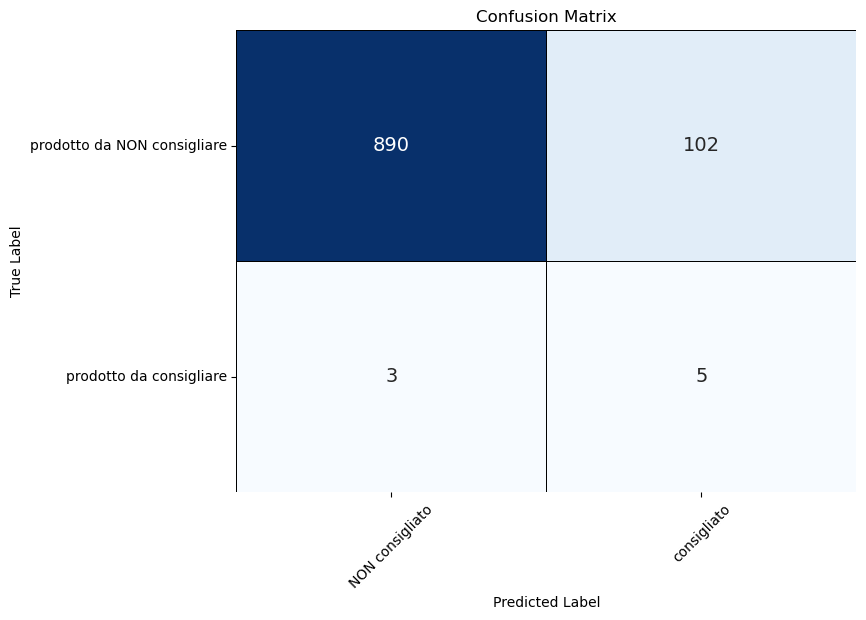

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       880
           1       0.34      0.97      0.50       120

    accuracy                           0.77      1000
   macro avg       0.67      0.86      0.68      1000
weighted avg       0.92      0.77      0.81      1000



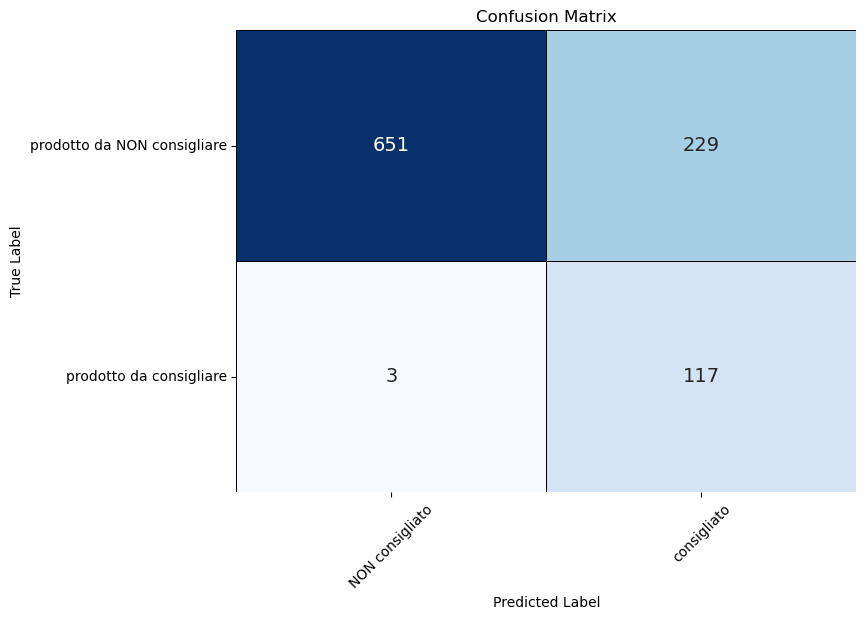

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       627
           1       0.74      1.00      0.85       373

    accuracy                           0.87      1000
   macro avg       0.87      0.89      0.87      1000
weighted avg       0.90      0.87      0.87      1000



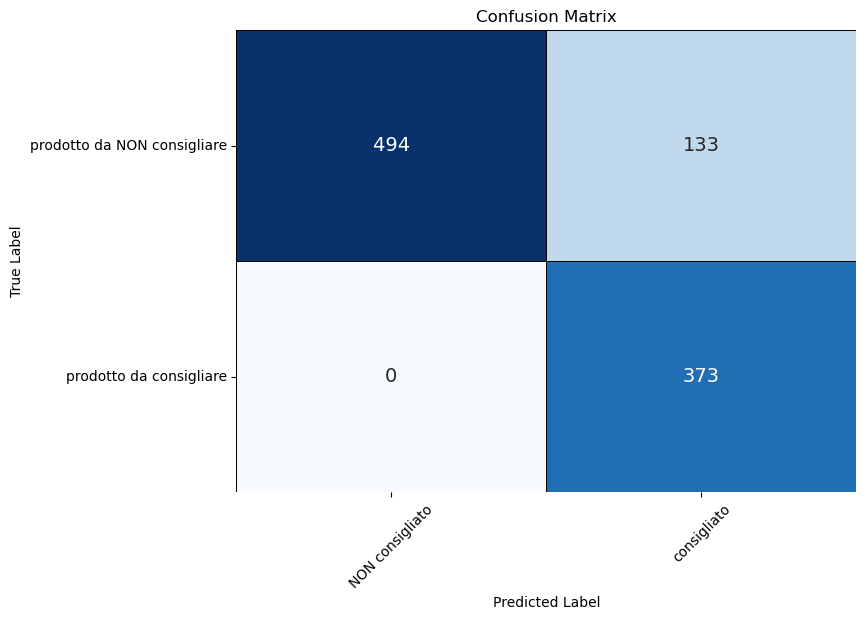

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       640
           1       0.94      1.00      0.97       360

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



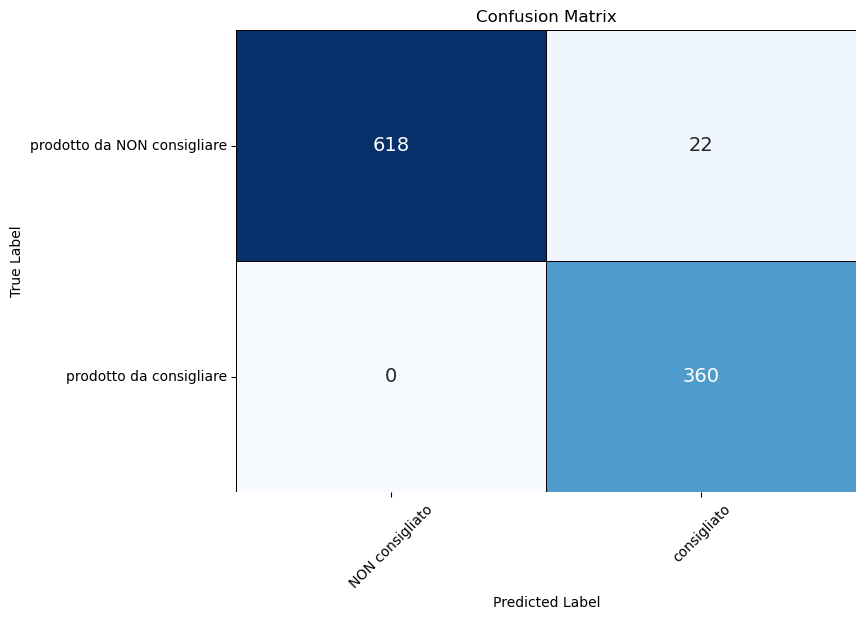

C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estim

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.97      1000
   macro avg       0.50      0.48      0.49      1000
weighted avg       1.00      0.97      0.98      1000



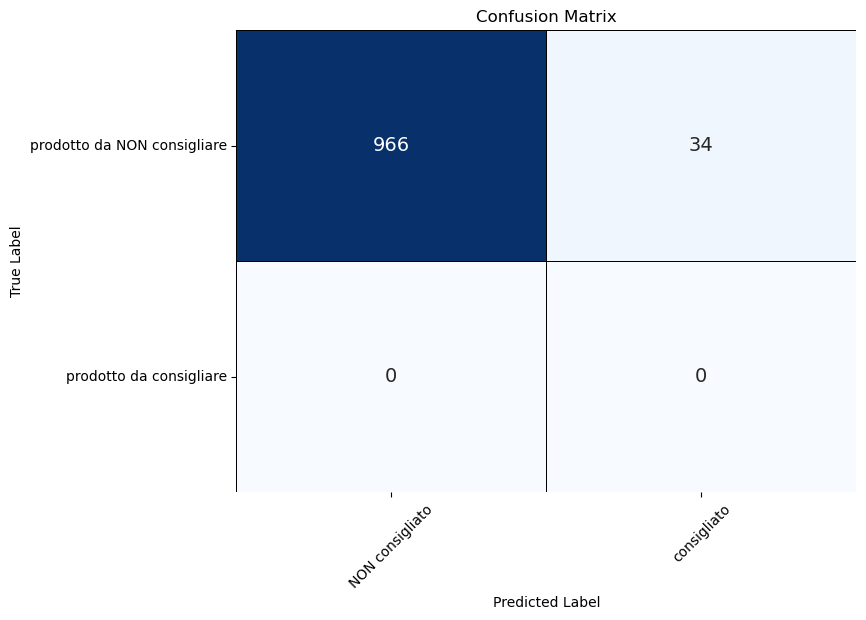

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

products = pd.read_excel('Products.xlsx')
clients = pd.read_excel('Needs.xlsx')
models=[]
thresholds=[]

def model_logistic(product):
    
    clients_df=pd.DataFrame(clients.copy())
    clients_df['key'] = 1
    
    product['key'] = 1
   
    df = pd.merge(clients_df, product, on='key')
    df.drop('key', axis=1, inplace=True)
    clients_df.drop('key', axis=1, inplace=True)
    product.drop('key', axis=1, inplace=True)

    df['flag'] = 0
    for index, row in df.iterrows():
        if ((row['IncomeInvestment'] == 1 and row['Type'] == 0) or (row['AccumulationInvestment'] == 1 and row['Type'] == 1)) and row['RiskPropensity'] >= row['Risk']:
            df.at[index, 'flag'] = 1

    # data split (train and test sets)

    X = df.drop(['ID', 'IDProduct', 'flag','Type','Risk'], axis=1)
    y = df['flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # model optimization (grid search for parameters)
    param_grid = {'C': [0.005, 0.01, 0.015, 0.02, 0.025]}
    grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # model training
    model= LogisticRegression(C=best_params['C'], max_iter=10000)
    model.fit(X_train, y_train)

    predicted_probabilities = model.predict_proba(X_test)
    threshold = df['flag'].sum()/len(df)
    y_pred2 = (predicted_probabilities[:, 1] >= threshold).astype(int)

    # model evaluation
    print(classification_report(y_test, y_pred2))

    # Calcoliamo la confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred2)

    # Definiamo le etichette delle classi
    class_names = ['prodotto da NON consigliare', 'prodotto da consigliare']
    class_names1 = ['NON consigliato', 'consigliato']
    # Creiamo un dataframe dalla confusion matrix per renderlo più leggibile con seaborn
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names1)

    # Creiamo il plot della confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, 
                annot_kws={"size": 14}, linewidths=0.5, linecolor='black')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    return model,threshold

for i in range(11):
    model, threshold = model_logistic(pd.DataFrame(products.iloc[i]).transpose())
    models.append(model)
    thresholds.append(threshold)

Statistica del prodotto con la massima percentuale di raccomandazione:
Product ID                    9.0
Recommendation Percentage    51.1
Name: 8, dtype: float64


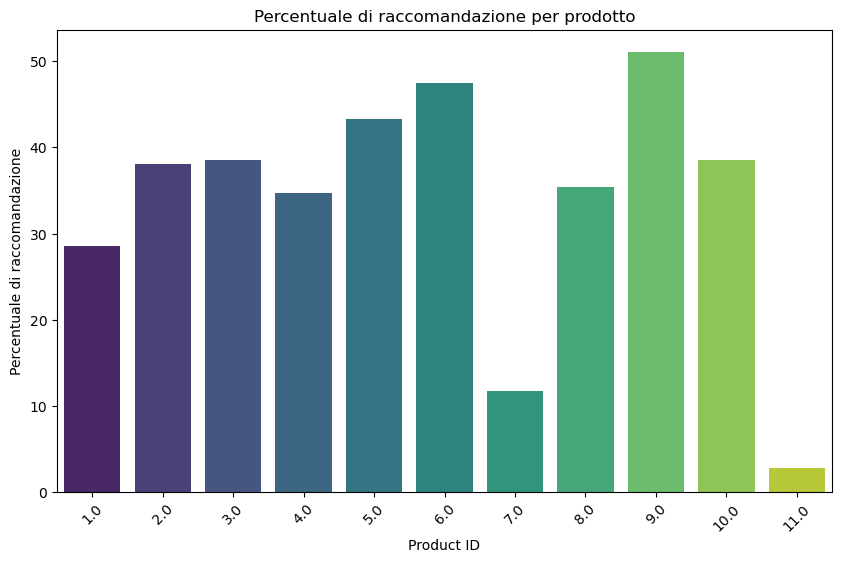

In [15]:
# Inizializzazione di liste per salvare le statistiche
product_stats = []

# Iterazione attraverso i modelli e le soglie per ottenere le statistiche per ciascun prodotto
for i, model in enumerate(models):
    product = products.iloc[i]
    threshold = thresholds[i]
    
    # Utilizziamo i dati dei clienti (senza l'ID) per fare previsioni per il prodotto corrente
    X_clients = clients.drop('ID', axis=1)
    
    # Previsioni utilizzando il modello per il prodotto corrente
    predicted_probabilities = model.predict_proba(X_clients)[:, 1]
    y_pred = (predicted_probabilities >= threshold).astype(int)
    
    # Calcolo della percentuale di clienti raccomandati
    recommend_percentage = y_pred.mean() * 100
    
    # Salvataggio delle statistiche per il prodotto corrente
    product_stat = {
        'Product ID': product['IDProduct'],
        'Recommendation Percentage': recommend_percentage
    }
    product_stats.append(product_stat)

# Creazione di un DataFrame per le statistiche
product_stats_df = pd.DataFrame(product_stats)

# Troviamo il prodotto con la massima percentuale di raccomandazione
best_product_recommendation = product_stats_df.loc[product_stats_df['Recommendation Percentage'].idxmax()]

print("Statistica del prodotto con la massima percentuale di raccomandazione:")
print(best_product_recommendation)

# Plot delle statistiche per confrontare i prodotti
plt.figure(figsize=(10, 6))
sns.barplot(x='Product ID', y='Recommendation Percentage', data=product_stats_df, palette='viridis')
plt.title('Percentuale di raccomandazione per prodotto')
plt.xlabel('Product ID')
plt.ylabel('Percentuale di raccomandazione')
plt.xticks(rotation=45)
plt.show()

Media della percentuale di raccomandazione: 33.64545454545455
Deviazione standard della percentuale di raccomandazione: 14.570452541795923


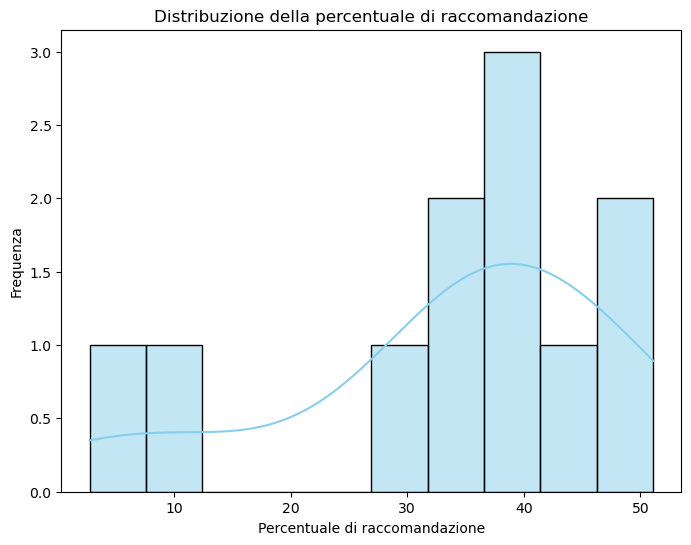

Percentuale del prodotto più popolare raccomandato: 51.1


In [23]:
# Calcolo della media e della deviazione standard delle percentuali di raccomandazione
mean_recommendation_percentage = product_stats_df['Recommendation Percentage'].mean()
std_recommendation_percentage = product_stats_df['Recommendation Percentage'].std()

print("Media della percentuale di raccomandazione:", mean_recommendation_percentage)
print("Deviazione standard della percentuale di raccomandazione:", std_recommendation_percentage)



# Plot della distribuzione della percentuale di raccomandazione
plt.figure(figsize=(8, 6))
sns.histplot(product_stats_df['Recommendation Percentage'], bins=10, kde=True, color='skyblue')
plt.title('Distribuzione della percentuale di raccomandazione')
plt.xlabel('Percentuale di raccomandazione')
plt.ylabel('Frequenza')
plt.show()


print("Percentuale del prodotto più popolare raccomandato:", product_stats_df['Recommendation Percentage'].max())

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       930
           1       0.23      0.94      0.37        70

    accuracy                           0.78      1000
   macro avg       0.61      0.85      0.62      1000
weighted avg       0.94      0.78      0.83      1000



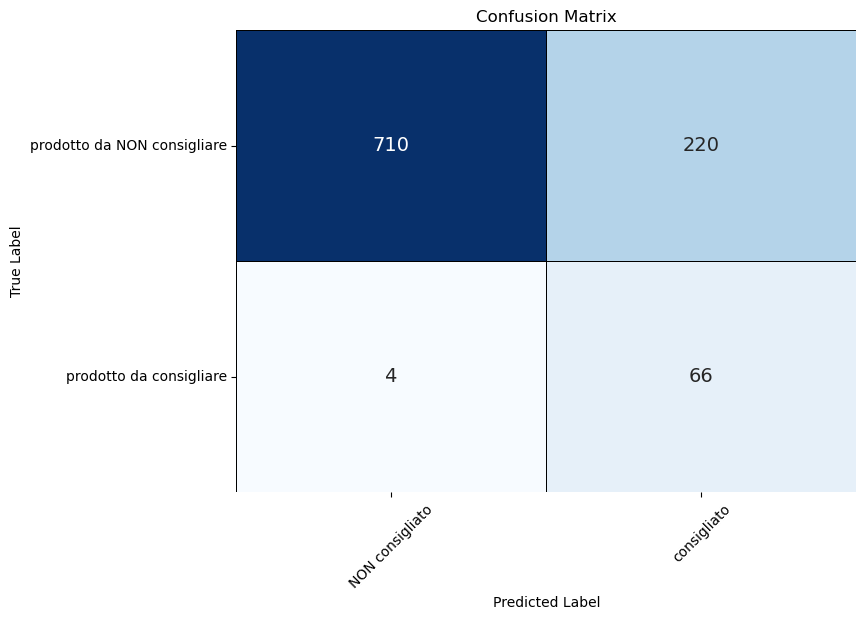

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       756
           1       0.64      1.00      0.78       244

    accuracy                           0.86      1000
   macro avg       0.82      0.91      0.84      1000
weighted avg       0.91      0.86      0.87      1000



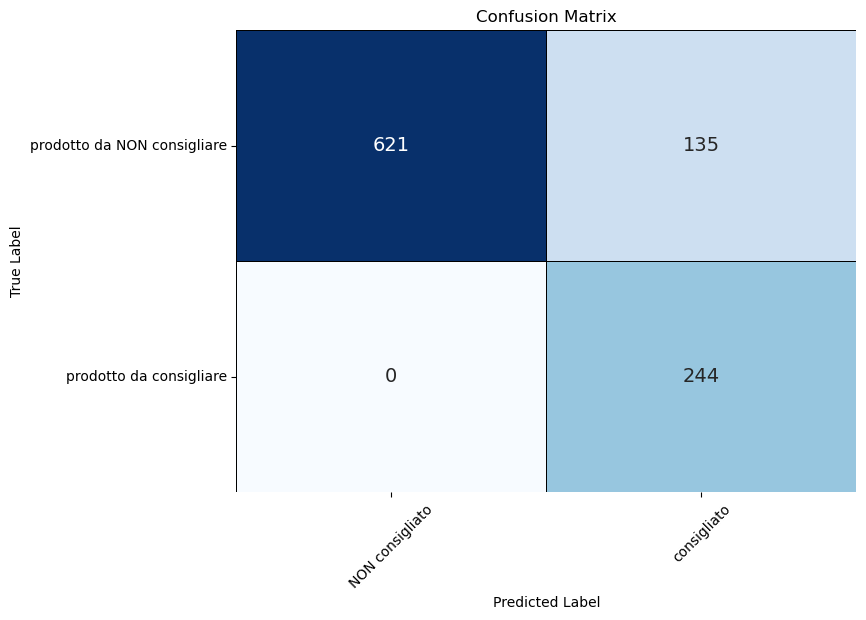

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       634
           1       0.96      1.00      0.98       366

    accuracy                           0.98      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.98      0.98      0.98      1000



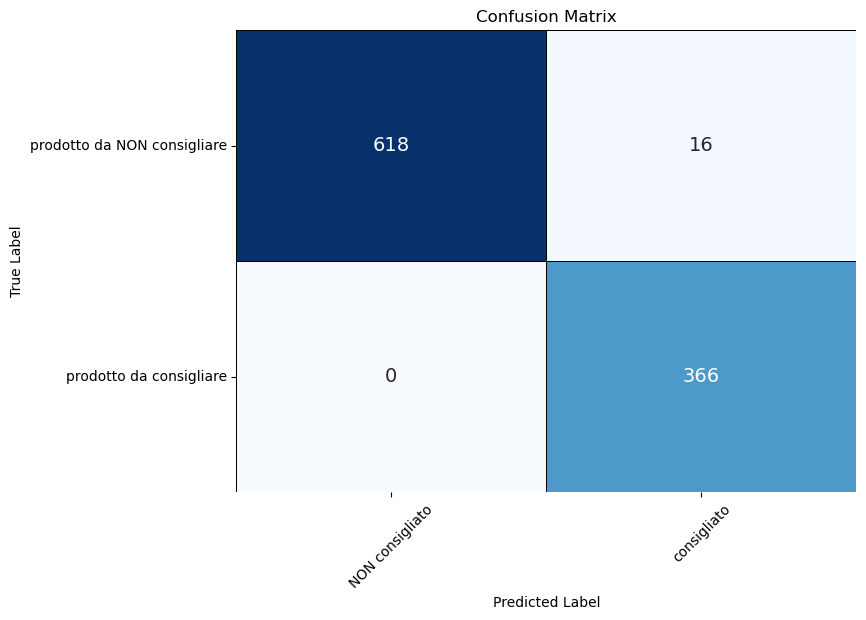

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       883
           1       0.34      1.00      0.50       117

    accuracy                           0.77      1000
   macro avg       0.67      0.87      0.68      1000
weighted avg       0.92      0.77      0.81      1000



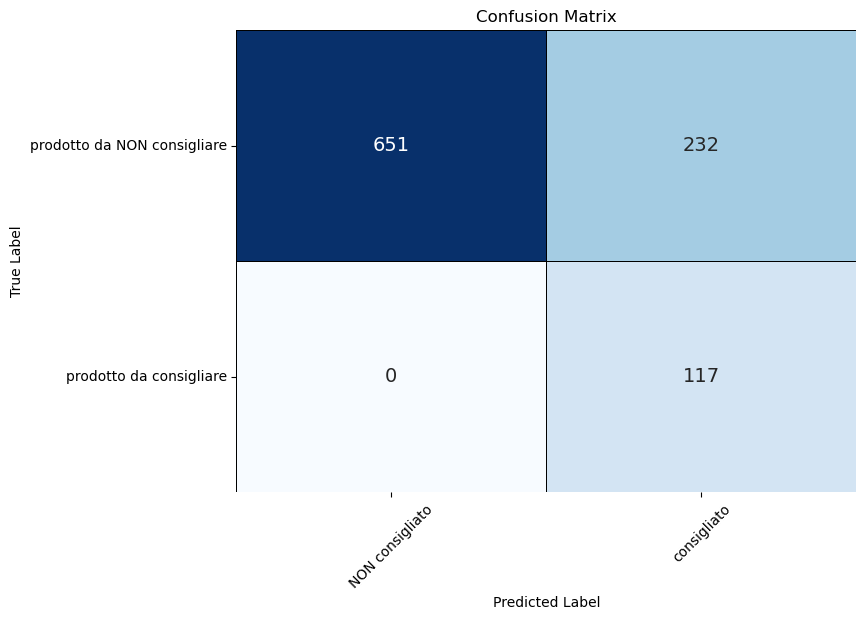

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       815
           1       0.43      1.00      0.60       185

    accuracy                           0.76      1000
   macro avg       0.72      0.85      0.71      1000
weighted avg       0.89      0.76      0.78      1000



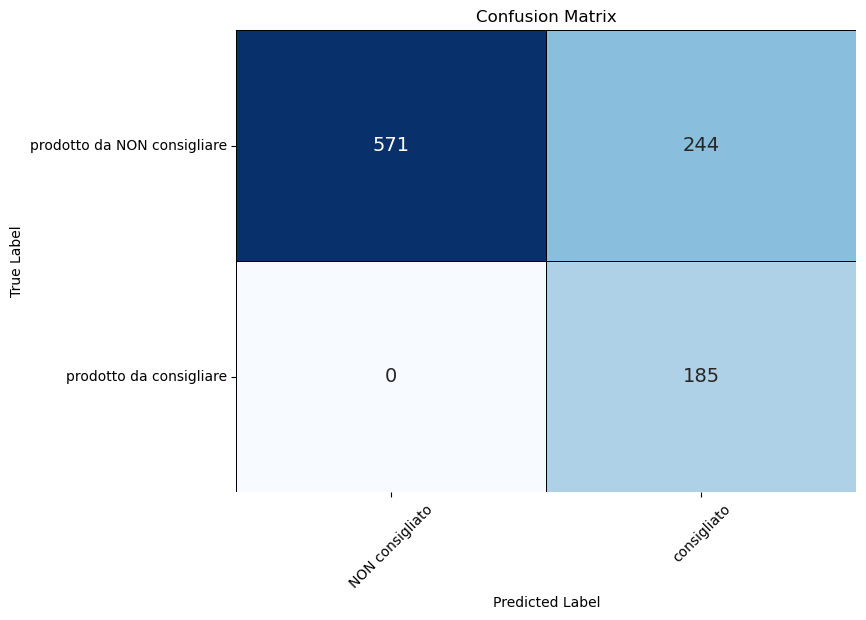

              precision    recall  f1-score   support

           0       1.00      0.70      0.83       749
           1       0.53      0.99      0.69       251

    accuracy                           0.78      1000
   macro avg       0.76      0.85      0.76      1000
weighted avg       0.88      0.78      0.79      1000



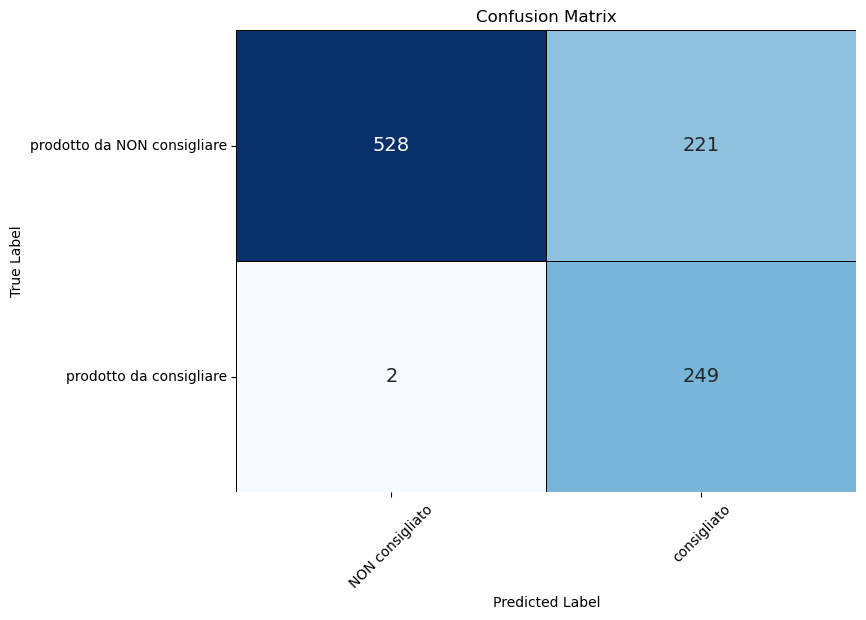

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       992
           1       0.05      0.62      0.09         8

    accuracy                           0.90      1000
   macro avg       0.52      0.76      0.52      1000
weighted avg       0.99      0.90      0.94      1000



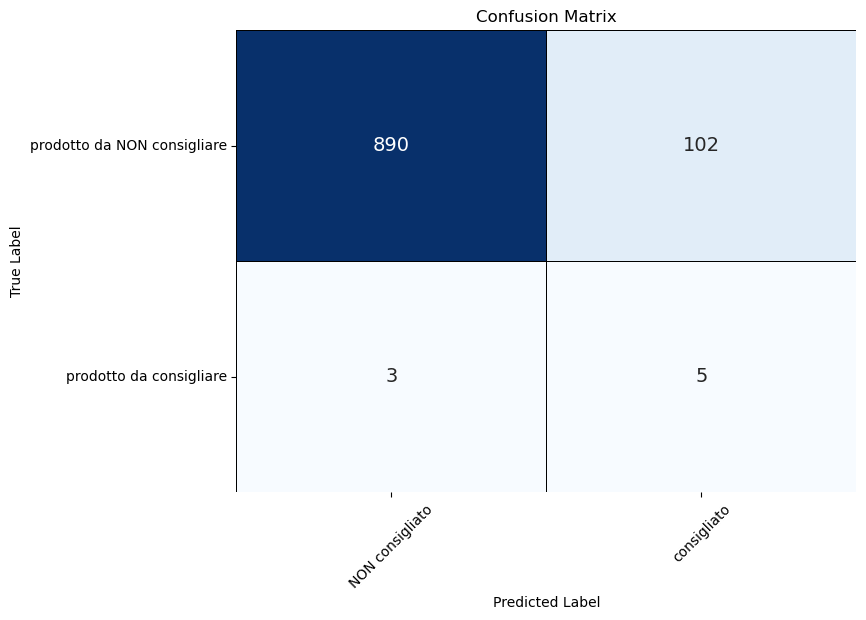

C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85       880
           1       0.34      0.97      0.50       120

    accuracy                           0.77      1000
   macro avg       0.67      0.86      0.68      1000
weighted avg       0.92      0.77      0.81      1000



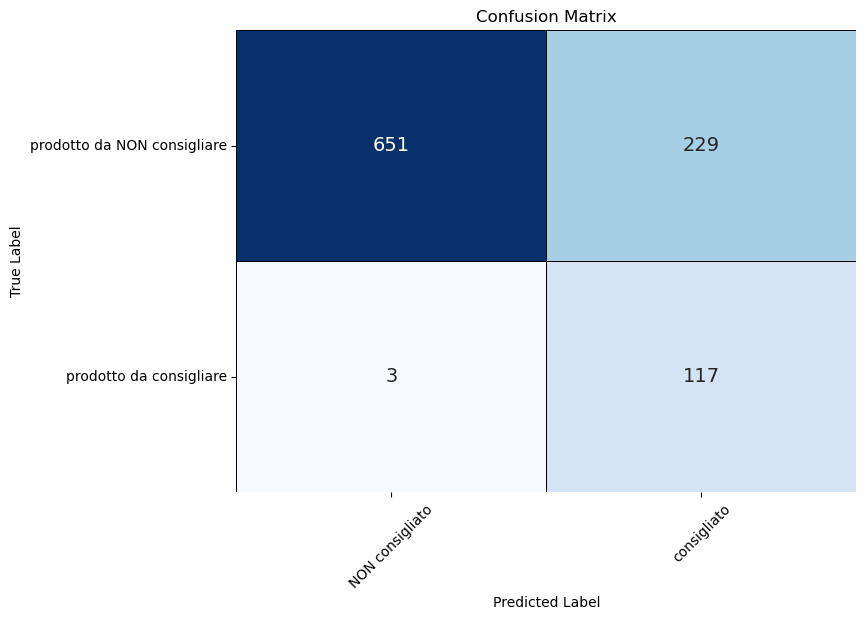

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       627
           1       0.74      1.00      0.85       373

    accuracy                           0.87      1000
   macro avg       0.87      0.89      0.87      1000
weighted avg       0.90      0.87      0.87      1000



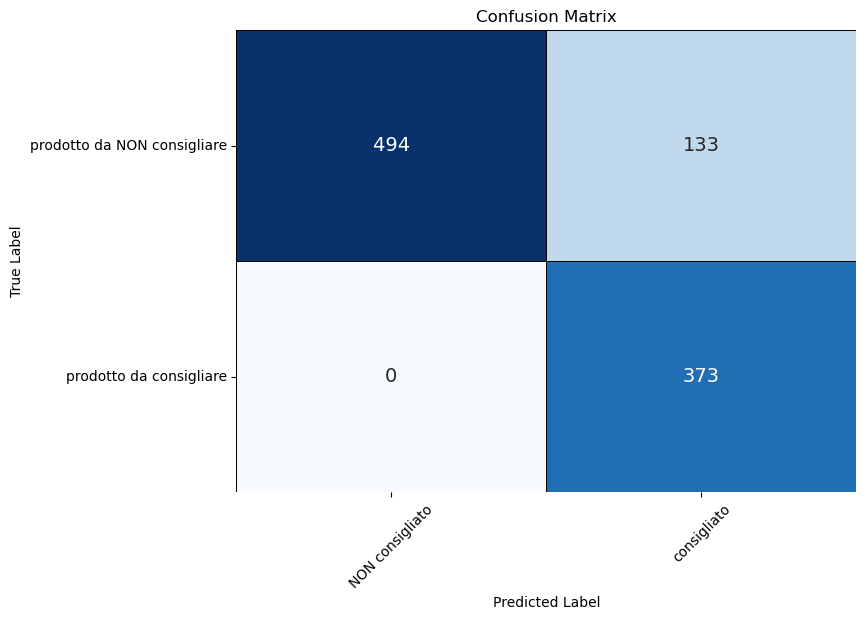

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       640
           1       0.94      1.00      0.97       360

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



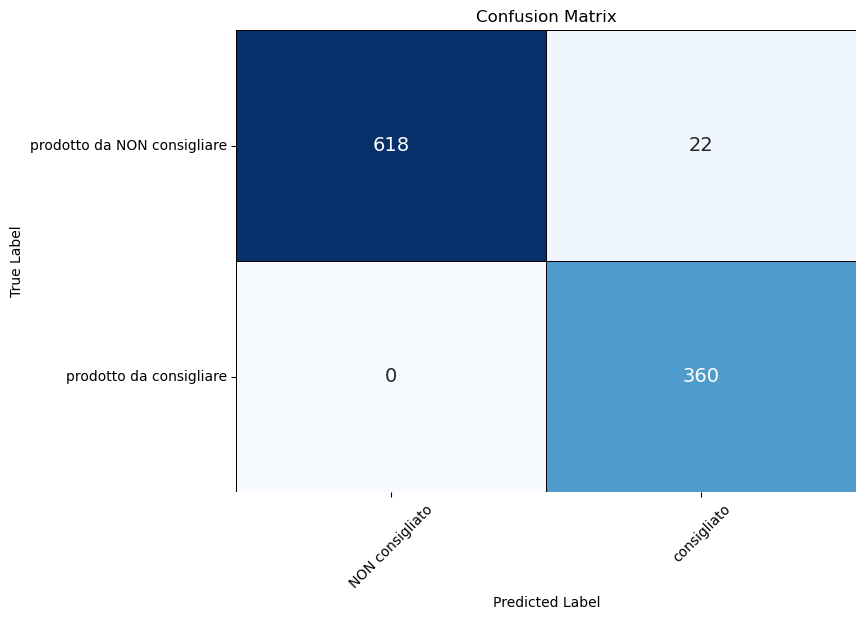

C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estim

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.97      1000
   macro avg       0.50      0.48      0.49      1000
weighted avg       1.00      0.97      0.98      1000



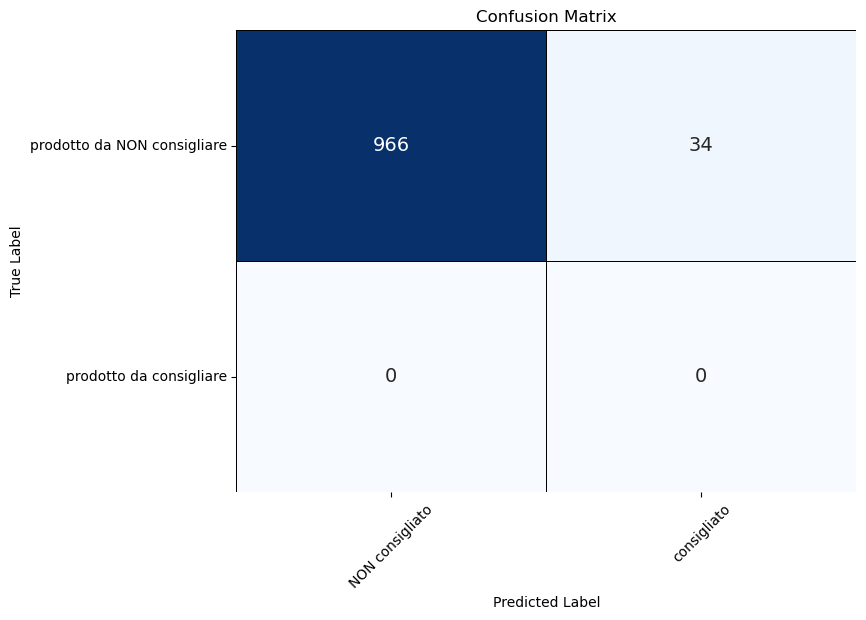

C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estima

Model 1:
Average Accuracy: 0.9376
Average Precision: 0.6795891690009337
Average Recall: 0.10909090909090909
Average F1-Score: 0.18429031397023915

Model 2:
Average Accuracy: 0.9311999999999999
Average Precision: 0.8613832026126694
Average Recall: 0.8622036533229693
Average F1-Score: 0.861531219765914

Model 3:
Average Accuracy: 0.9827999999999999
Average Precision: 0.9552202725693475
Average Recall: 1.0
Average F1-Score: 0.9770884446172119

Model 4:
Average Accuracy: 0.8896000000000001
Average Precision: 0.7862368062094464
Average Recall: 0.21264162194394753
Average F1-Score: 0.33316521428588797

Model 5:
Average Accuracy: 0.8612
Average Precision: 0.8653221990249367
Average Recall: 0.3387998942638118
Average F1-Score: 0.4855114847322328

Model 6:
Average Accuracy: 0.8744
Average Precision: 0.87951738405426
Average Recall: 0.6004455004455004
Average F1-Score: 0.7128775317007467

Model 7:
Average Accuracy: 0.9950000000000001
Average Precision: 0.4
Average Recall: 0.11333333333333333
Ave

C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\coraz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---

In [33]:
from sklearn.model_selection import cross_val_score

# List to store evaluation metrics
model_metrics = []

for i in range(11):
    model, threshold = model_logistic(pd.DataFrame(products.iloc[i]).transpose())
    models.append(model)
    thresholds.append(threshold)
    product=pd.DataFrame(products.iloc[i]).transpose()
    clients_df=pd.DataFrame(clients.copy())
    clients_df['key'] = 1
    
    product['key'] = 1
   
    df = pd.merge(clients_df, product, on='key')
    df.drop('key', axis=1, inplace=True)
    clients_df.drop('key', axis=1, inplace=True)
    product.drop('key', axis=1, inplace=True)

    df['flag'] = 0
    for index, row in df.iterrows():
        if ((row['IncomeInvestment'] == 1 and row['Type'] == 0) or (row['AccumulationInvestment'] == 1 and row['Type'] == 1)) and row['RiskPropensity'] >= row['Risk']:
            df.at[index, 'flag'] = 1

    # data split (train and test sets)

    X = df.drop(['ID', 'IDProduct', 'flag','Type','Risk'], axis=1)
    y = df['flag']
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

    # Compute mean scores
    accuracy = np.mean(cv_scores)
    precision = np.mean(cv_precision)
    recall = np.mean(cv_recall)
    f1_score = np.mean(cv_f1)
    
    # Append metrics to list
    model_metrics.append({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score})

# Print statistics for each model
for i, metrics in enumerate(model_metrics):
    print(f"Model {i+1}:")
    print("Average Accuracy:", metrics['accuracy'])
    print("Average Precision:", metrics['precision'])
    print("Average Recall:", metrics['recall'])
    print("Average F1-Score:", metrics['f1_score'])
    print()


array([0, 0, 1, ..., 0, 0, 0])